# Graph States from Knowledge Graphs

In this short notebook, we have ChatGPT create code that comes from the following prompts:

"Could you please provide me with code that first tokenizes the text, then identify the entities and concepts mentioned in the text. Next, create nodes in the knowledge graph for each entity and concept. Next, connect the nodes with edges that represent the relationships between them and plot the graph. Once we have constructed the knowledge graph, we can associate it with a graph state using Cirq from quantum computing by encoding the nodes as qubits, and edges as two qubit gates for entangling the qubits connected by edges. One common method is to use the graph state formalism, which involves creating a single-qubit state for each node and a two-qubit entangling gate for each edge in Cirq."

ChatGPT:

"Sure, here is the Python code that tokenizes the text, identifies the entities and concepts, creates a knowledge graph, and plots it using NetworkX:"

"

                ┌──┐           ┌──┐   ┌──┐   ┌──┐       ┌──┐           ┌──┐                                       ┌──┐               ┌──┐
(0, 0): ────H────@─────@───@────@──────@──────@─────────────────────────────────────────────────────────────────────────────────────────────────────
                 │     │   │    │      │      │
(0, 1): ────H────┼─────┼───X────┼@─────┼@─────┼@────@────@──────────────────────────────────────────────────────────────────────────────────────────
                 │     │        ││     ││     ││    │    │
(0, 2): ────H────┼@────┼────────┼┼─────┼┼─────┼┼────┼────┼@────@───@────@───────────────────────────────────────────────────────────────────────────
                 ││    │        ││     ││     ││    │    ││    │   │    │
(0, 3): ────H────┼┼────┼────────┼┼─────┼┼─────X┼────┼────X┼────┼───┼────┼─────@───@───@───@─────────────────────────────────────────────────────────
                 ││    │        ││     ││      │    │     │    │   │    │     │   │  

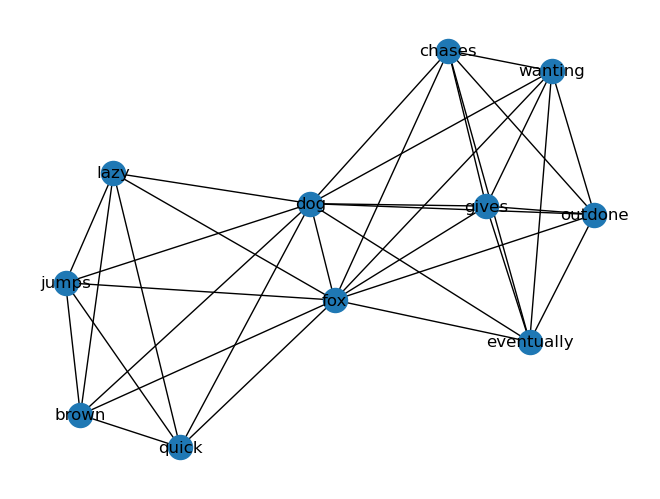

In [1]:
import networkx as nx
import spacy
import cirq

# Load the Spacy English language model
nlp = spacy.load('en_core_web_sm')

# Define the text to be processed
sample_text = "The quick brown fox jumps over the lazy dog. The dog, not wanting to be outdone, chases after the fox but eventually gives up."

# Tokenize the text using Spacy
doc = nlp(sample_text)

# Create a set of all the unique entities and concepts in the text
entities = set([ent.text.lower() for ent in doc.ents])
concepts = set([token.text.lower() for token in doc if not token.is_stop and token.is_alpha])

# Create a NetworkX graph for the knowledge graph
graph = nx.Graph()

# Add the entities and concepts as nodes in the graph
for entity in entities:
    graph.add_node(entity)
for concept in concepts:
    graph.add_node(concept)

# Add edges between nodes based on the relationships in the text
for sentence in doc.sents:
    for token1 in sentence:
        for token2 in sentence:
            if token1 != token2 and (token1.text.lower() in entities or token1.text.lower() in concepts) and (token2.text.lower() in entities or token2.text.lower() in concepts):
                graph.add_edge(token1.text.lower(), token2.text.lower())

# Draw the graph using NetworkX
nx.draw(graph, with_labels=True)

# Create a dictionary mapping each node to a qubit
qubit_map = {node: cirq.GridQubit(0, i) for i, node in enumerate(graph.nodes)}

# Create a circuit representing the graph state
circuit = cirq.Circuit()
for node in graph.nodes:
    circuit.append(cirq.H(qubit_map[node]))
for edge in graph.edges:
    qubit1, qubit2 = qubit_map[edge[0]], qubit_map[edge[1]]
    circuit.append(cirq.CNOT(qubit1, qubit2))

# Print the circuit
print(circuit)

               ┌──┐   ┌──┐       ┌──┐       ┌──┐
(0, 0): ───H────@──────@───────────────────────────────────
                │      │
(0, 1): ───H────┼@─────┼@────@────@────────────────────────
                ││     ││    │    │
(0, 2): ───H────┼┼─────┼┼────X────┼@────@────@─────────────
                ││     ││         ││    │    │
(0, 3): ───H────┼┼─────┼X─────────┼┼────X────┼@────@───────
                ││     │          ││         ││    │
(0, 4): ───H────X┼─────┼─────@────┼┼─────────┼┼────┼───────
                 │     │     │    ││         ││    │
(0, 5): ───H─────┼─────┼─────┼────X┼─────────X┼────X───@───
                 │     │     │     │          │        │
(0, 6): ───H─────┼─────X─────X─────┼──────────┼────────┼───
                 │                 │          │        │
(0, 7): ───H─────X─────────────────X──────────X────────X───
               └──┘   └──┘       └──┘       └──┘


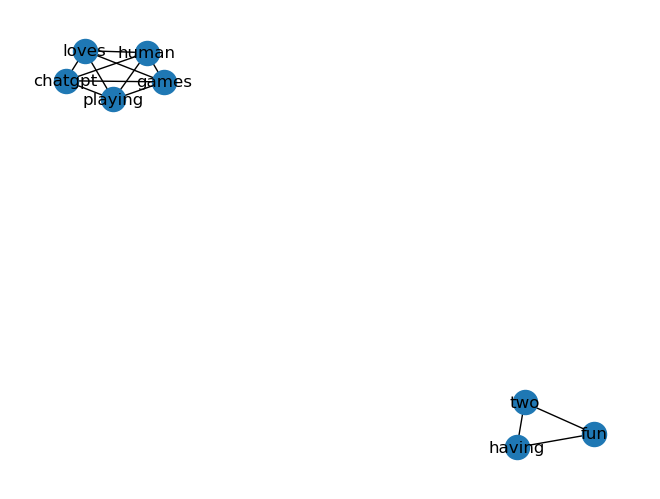

In [2]:
import networkx as nx
import spacy
import cirq

# Load the Spacy English language model
nlp = spacy.load('en_core_web_sm')

# Define the text to be processed
sample_text = "The human loves playing games with ChatGPT. The two are having so much fun together."

# Tokenize the text using Spacy
doc = nlp(sample_text)

# Create a set of all the unique entities and concepts in the text
entities = set([ent.text.lower() for ent in doc.ents])
concepts = set([token.text.lower() for token in doc if not token.is_stop and token.is_alpha])

# Create a NetworkX graph for the knowledge graph
graph = nx.Graph()

# Add the entities and concepts as nodes in the graph
for entity in entities:
    graph.add_node(entity)
for concept in concepts:
    graph.add_node(concept)

# Add edges between nodes based on the relationships in the text
for sentence in doc.sents:
    for token1 in sentence:
        for token2 in sentence:
            if token1 != token2 and (token1.text.lower() in entities or token1.text.lower() in concepts) and (token2.text.lower() in entities or token2.text.lower() in concepts):
                graph.add_edge(token1.text.lower(), token2.text.lower())

# Draw the graph using NetworkX
nx.draw(graph, with_labels=True)

# Create a dictionary mapping each node to a qubit
qubit_map = {node: cirq.GridQubit(0, i) for i, node in enumerate(graph.nodes)}

# Create a circuit representing the graph state
circuit = cirq.Circuit()
for node in graph.nodes:
    circuit.append(cirq.H(qubit_map[node]))
for edge in graph.edges:
    qubit1, qubit2 = qubit_map[edge[0]], qubit_map[edge[1]]
    circuit.append(cirq.CNOT(qubit1, qubit2))

# Print the circuit
print(circuit)


Prompt:

"Could you please repeat this task but instead use "named entity recognition" or "topic modeling". Please keep the code constructing the graph state in Cirq the same." 


ChatGPT:

"Sure, here is the updated Python code that uses named entity recognition and topic modeling to identify entities and concepts in the text and construct the knowledge graph:"



                       ┌──┐   ┌──┐
(0, 0): ───H───@───@────@──────@─────────────
               │   │    │      │
(0, 1): ───H───┼───X────┼@─────┼@────@───────
               │        ││     ││    │
(0, 2): ───H───X────────┼X─────┼┼────┼───────
                        │      ││    │
(0, 3): ───H────────────┼──────X┼────X───@───
                        │       │        │
(0, 4): ───H────────────X───────X────────X───
                       └──┘   └──┘


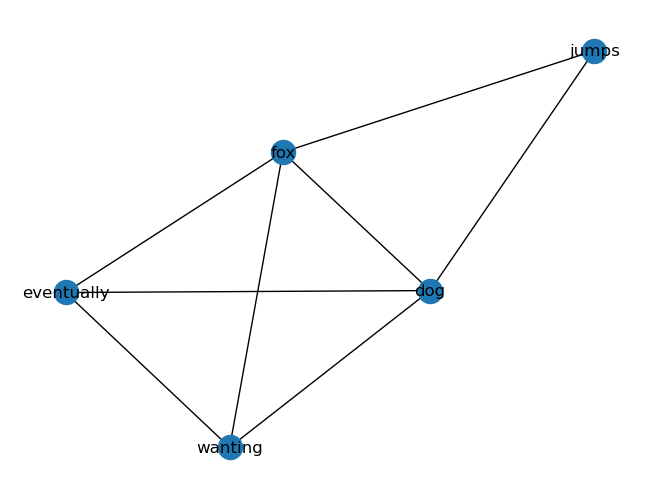

In [3]:
import networkx as nx
import spacy
import cirq

# Load the Spacy English language model
nlp = spacy.load('en_core_web_sm')

# Define the text to be processed
sample_text = "The quick brown fox jumps over the lazy dog. The dog, not wanting to be outdone, chases after the fox but eventually gives up."

# Extract named entities from the text using Spacy
doc = nlp(sample_text)
entities = set([ent.text.lower() for ent in doc.ents])

# Use topic modeling to identify concepts in the text
from gensim import corpora, models
from gensim.utils import simple_preprocess
from pprint import pprint

# Tokenize the text using Gensim's simple_preprocess() function
tokens = [token for token in simple_preprocess(sample_text) if token not in nlp.Defaults.stop_words]

# Create a dictionary and corpus for the text
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

# Train a LDA model on the corpus with 1 topic
lda_model = models.LdaModel(corpus, num_topics=1, id2word=dictionary)

# Get the top 5 most probable words for the topic
topic_words = [word for word, prob in lda_model.show_topic(0, topn=5)]

# Create a NetworkX graph for the knowledge graph
graph = nx.Graph()

# Add the entities and concepts as nodes in the graph
for entity in entities:
    graph.add_node(entity)
for concept in topic_words:
    graph.add_node(concept)

# Add edges between nodes based on the relationships in the text
for sentence in doc.sents:
    for token1 in sentence:
        for token2 in sentence:
            if token1 != token2 and (token1.text.lower() in entities or token1.text.lower() in topic_words) and (token2.text.lower() in entities or token2.text.lower() in topic_words):
                graph.add_edge(token1.text.lower(), token2.text.lower())

# Draw the graph using NetworkX
nx.draw(graph, with_labels=True)

# Create a dictionary mapping each node to a qubit
qubit_map = {node: cirq.GridQubit(0, i) for i, node in enumerate(graph.nodes)}

# Create a circuit representing the graph state
circuit = cirq.Circuit()
for node in graph.nodes:
    circuit.append(cirq.H(qubit_map[node]))
for edge in graph.edges:
    qubit1, qubit2 = qubit_map[edge[0]], qubit_map[edge[1]]
    circuit.append(cirq.CNOT(qubit1, qubit2))

# Print the circuit
print(circuit)


"This code first extracts named entities from the sample_text using Spacy's named entity recognition. It then uses Gensim's topic modeling to identify concepts in the text by training an LDA model on the tokenized text with 1 topic and extracting the top 5 most probable words for the topic. It creates a NetworkX graph for the knowledge graph and adds the entities and concepts as nodes in the graph. It adds edges between nodes based on the relationships in the text by connecting nodes that appear in the same sentence. It then plots the graph using NetworkX.

After constructing the knowledge graph, the code creates a dictionary that maps each node in the graph to a qubit using Cirq's GridQubit class. It then creates a circuit representing the graph state by applying a Hadamard"

Note, we can turn this into a quantum surface code by comput minimal genus surface of this graph, by then adding one qubit for each edge (making the graph bipartite), and then by constructing the dual graph (with nodes for faces and edges). One place we can do this, is: [SageMath](https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/genus.html)